## Exploratory Data Analysis (2 samples, 10,000 random points)

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/airplane_data_full.csv',delimiter=';')
data = data.iloc[: , 1:]
display(data.head())
display(data.shape)

,fl_date,mkt_carrier_fl_num,origin_city_name,dest_city_name,distance,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-08-21,2009,"Atlanta, GA","Chicago, IL",606.0,-1.0,-10.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-21,2009,"Chicago, IL","Atlanta, GA",606.0,-4.0,-16.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-21,2010,"Atlanta, GA","Indianapolis, IN",432.0,-7.0,-9.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-21,2011,"Atlanta, GA","Cincinnati, OH",373.0,-4.0,-5.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-21,2012,"Chicago, IL","Atlanta, GA",606.0,-4.0,25.0,0.0,0.0,25.0,0.0,0.0


(15927485, 12)

In [22]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data.head(20))
display(data.shape)

,Total,Percent
late_aircraft_delay,12918001,0.811051
security_delay,12918001,0.811051
nas_delay,12918001,0.811051
weather_delay,12918001,0.811051
carrier_delay,12918001,0.811051
arr_delay,311744,0.019573
dep_delay,263754,0.016560
distance,0,0.000000
dest_city_name,0,0.000000
origin_city_name,0,0.000000


(15927485, 12)

In [4]:
#create two samples of 10,000 points each
sample1 = data.sample(n=10000, random_state=0)
sample2 = data.sample(n=10000, random_state=1)

sample1['month'] = pd.DatetimeIndex(sample1['fl_date']).month
sample2['month'] = pd.DatetimeIndex(sample2['fl_date']).month

In [23]:
sample1.groupby(by='month').size()

month
1     773
2     698
3     815
4     842
5     856
6     866
7     857
8     914
9     855
10    852
11    830
12    842
dtype: int64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

Observations:
* The delay forms a normal distribution however there is a tail which means there are some very lenghty delays. 
* Since we don't see a tail on the others side, this would mean that flights don't come to ahead of time


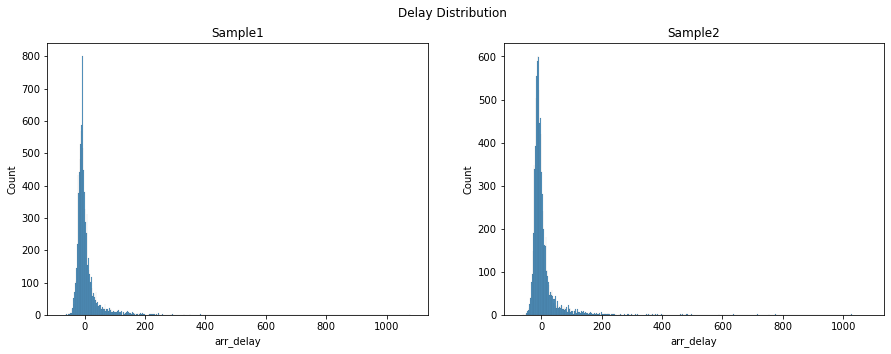

In [5]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Delay Distribution')

#sample1 
sns.histplot(sample1['arr_delay'], ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.histplot(sample2['arr_delay'], ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* The delay forms a normal distribution however there is a tail which means there are some very lenghty delays. 
* Since we don't see a tail on the others side, this would mean that flights don't come to ahead of time'''
)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

Observations:
* There seems to be a great deal of variation in the average delay per month when using random datapoints
* Re-visit this with whole dataset, and seperate by year?



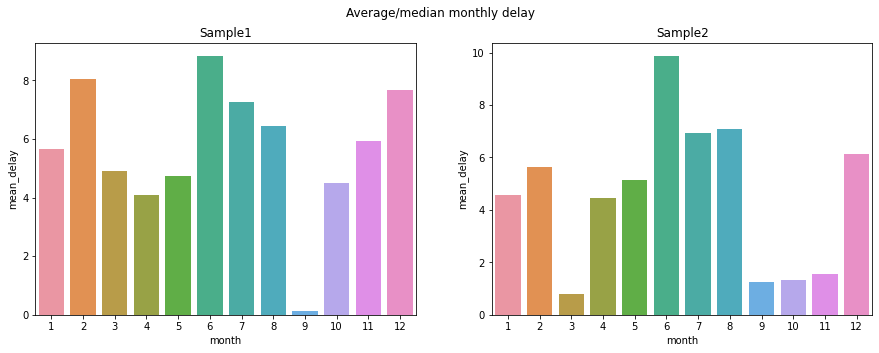

In [6]:
#data formatting
monthly_delay1 = sample1[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
monthly_delay1.columns = [''] * len(monthly_delay1.columns)
monthly_delay1.columns=['month','size','mean_delay','min_delay','max_delay']

monthly_delay2 = sample2[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
monthly_delay2.columns = [''] * len(monthly_delay1.columns)
monthly_delay2.columns=['month','size','mean_delay','min_delay','max_delay']

#create charts
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Average/median monthly delay')

#sample1 
sns.barplot(x='month',y='mean_delay',data=monthly_delay1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.barplot(x='month',y='mean_delay',data=monthly_delay2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* There seems to be a great deal of variation in the average delay per month when using random datapoints
* Re-visit this with whole dataset, and seperate by year?
'''
)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

Observations:
* 



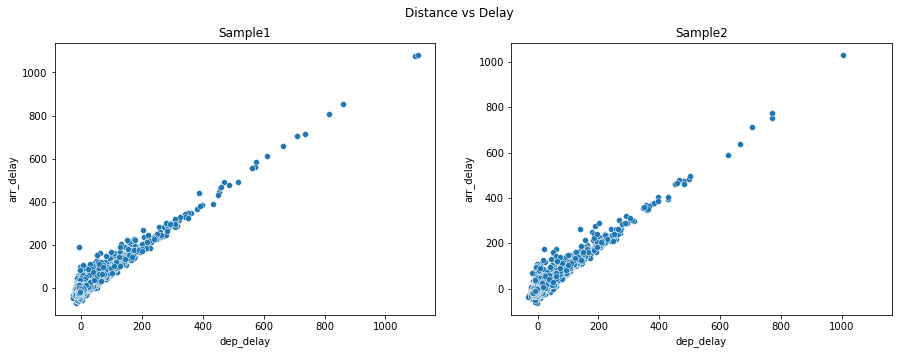

In [19]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Distance vs Delay')

#sample1 
sns.scatterplot(x='dep_delay',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.scatterplot(x='dep_delay',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* 
'''
)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

#### **Realtionship between Distance and Delay**

Observations:
* Doesn't seem to be any relationship



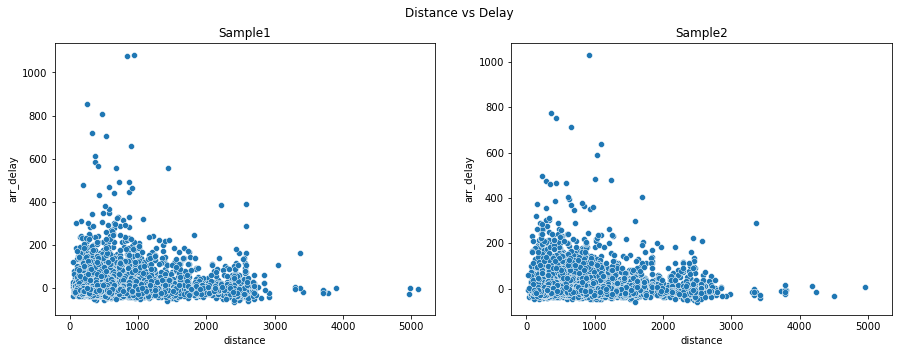

In [18]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Distance vs Delay')

#sample1 
sns.scatterplot(x='distance',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.scatterplot(x='distance',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* Doesn't seem to be any relationship
'''
)